### About Standardization

The result of standardization (or Z-score normalization) is that the features will be rescaled so that they’ll have the properties of a standard normal distribution with

μ=0 and σ=1
where μ is the mean (average) and σ is the standard deviation from the mean; standard scores (also called z scores) of the samples are calculated as follows:

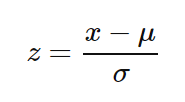

Standardizing the features so that they are centered around 0 with a standard deviation of 1 is not only important if we are comparing measurements that have different units, but it is also a general requirement for many machine learning algorithms. Intuitively, we can think of gradient descent as a prominent example (an optimization algorithm often used in logistic regression, SVMs, perceptrons, neural networks etc.); with features being on different scales, certain weights may update faster than others since the feature values xj play a role in the weight updates

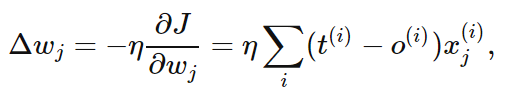

so that

wj:=wj+Δwj, where η is the learning rate, t the target class label, and o the actual output. Other intuitive examples include K-Nearest Neighbor algorithms and clustering algorithms that use, for example, Euclidean distance measures – in fact, tree-based classifier are probably the only classifiers where feature scaling doesn’t make a difference.

In fact, the only family of algorithms that I could think of being scale-invariant are tree-based methods. Let’s take the general CART decision tree algorithm. Without going into much depth regarding information gain and impurity measures, we can think of the decision as “is feature x_i >= some_val?” Intuitively, we can see that it really doesn’t matter on which scale this feature is (centimeters, Fahrenheit, a standardized scale – it really doesn’t matter).

### Some examples of algorithms where feature scaling matters are:

- k-nearest neighbors with an Euclidean distance measure if want all features to contribute equally
- k-means (see k-nearest neighbors)
- logistic regression, SVMs, perceptrons, neural networks etc. if you are using gradient descent/ascent-based optimization, otherwise some weights will update much faster than others
- linear discriminant analysis, principal component analysis, kernel principal component analysis since you want to find directions of maximizing the variance (under the constraints that those directions/eigenvectors/principal components are orthogonal); you want to have features on the same scale since you’d emphasize variables on “larger measurement scales” more. There are many more cases than I can possibly list here … I always recommend you to think about the algorithm and what it’s doing, and then it typically becomes obvious whether we want to scale your features or not.

In addition, we’d also want to think about whether we want to “standardize” or “normalize” (here: scaling to [0, 1] range) our data. Some algorithms assume that our data is centered at 0. For example, if we initialize the weights of a small multi-layer perceptron with tanh activation units to 0 or small random values centered around zero, we want to update the model weights “equally.” As a rule of thumb I’d say: When in doubt, just standardize the data, it shouldn’t hurt.

## About Min-Max Scaling (Normalization)

An alternative approach to Z-score normalization (or standardization) is the so-called Min-Max scaling (often also simply called “normalization” - a common cause for ambiguities).
In this approach, the data is scaled to a fixed range - usually 0 to 1.
The cost of having this bounded range - in contrast to standardization - is that we will end up with smaller standard deviations, which can suppress the effect of outliers.

A Min-Max scaling is typically done via the following equation:

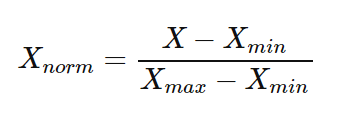

### Z-score standardization or Min-Max Scaling?

“Standardization or Min-Max scaling?” - There is no obvious answer to this question: it really depends on the application.

For example, in clustering analyses, standardization may be especially crucial in order to compare similarities between features based on certain distance measures. Another prominent example is the Principal Component Analysis, where we usually prefer standardization over Min-Max scaling, since we are interested in the components that maximize the variance (depending on the question and if the PCA computes the components via the correlation matrix instead of the covariance matrix)

However, this doesn’t mean that Min-Max scaling is not useful at all! A popular application is image processing, where pixel intensities have to be normalized to fit within a certain range (i.e., 0 to 255 for the RGB color range). Also, typical neural network algorithm require data that on a 0-1 scale.

## Standardizing and Normalizing - scikit-learn

In [2]:
# Importing libraries
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('wine.csv', usecols=[0,1,2])
df.columns = ['Class label', 'Alcohol', 'Malic acid']

In [4]:
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


As we can see in the table above, the features Alcohol (percent/volumne) and Malic acid (g/l) are measured on different scales, so that Feature Scaling is necessary important prior to any comparison or combination of these data.

In [12]:
# Applying Standardization 
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()
standard_scaled_data = std_scale.fit_transform(df[['Alcohol', 'Malic acid']])
standard_scaled_data[:5]

array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377]])

#### Note:
- We used fit_transform to calculate and transform the data at the same time
- StandardScaler() returns a numpy array (this will not be pandas dataframe anymore)
- For getting normal output we have to scale back the data using inverse_transform
- More info here: [docs](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [15]:
# Applying normalization
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler()
minmax_scaled_data = minmax_scale.fit_transform(df[['Alcohol', 'Malic acid']])
minmax_scaled_data[:5]

array([[0.84210526, 0.1916996 ],
       [0.57105263, 0.2055336 ],
       [0.56052632, 0.3201581 ],
       [0.87894737, 0.23913043],
       [0.58157895, 0.36561265]])

In [19]:
# Mean and standard deviation after standardization

print('Mean after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(standard_scaled_data[:,0].mean(), standard_scaled_data[:,1].mean()))
print('\nStandard deviation after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(standard_scaled_data[:,0].std(), standard_scaled_data[:,1].std()))

Mean after standardization:
Alcohol=-0.00, Malic acid=-0.00

Standard deviation after standardization:
Alcohol=1.00, Malic acid=1.00


In [20]:
# Min and Max Value after standardization

print('Min-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(minmax_scaled_data[:,0].min(), minmax_scaled_data[:,1].min()))
print('\nMax-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(minmax_scaled_data[:,0].max(), minmax_scaled_data[:,1].max()))

Min-value after min-max scaling:
Alcohol=0.00, Malic acid=0.00

Max-value after min-max scaling:
Alcohol=1.00, Malic acid=1.00


## Plotting

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

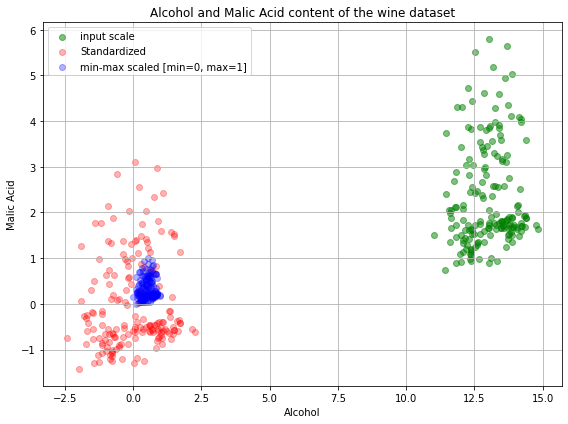

In [26]:
def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['Alcohol'], df['Malic acid'],
            color='green', label='input scale', alpha=0.5)

    plt.scatter(standard_scaled_data[:,0], standard_scaled_data[:,1], color='red',
            label='Standardized', alpha=0.3)

    plt.scatter(minmax_scaled_data[:,0], minmax_scaled_data[:,1],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Alcohol and Malic Acid content of the wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()